<a href="https://colab.research.google.com/github/easyforitall/Loan-Status_prediction-using-ML/blob/main/Loan_Status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("C://Users//43720//Downloads//archive//Loan payments data.csv")

In [ ]:
df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


CLEANING

In [ ]:
df.shape

(500, 11)

In [ ]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [ ]:
df.describe(include="O")

,Loan_ID,loan_status,effective_date,due_date,paid_off_time,education,Gender
count,500,500,500,500,400,500,500
unique,500,3,7,25,320,4,2
top,xqd20160291,PAIDOFF,9/11/2016,10/10/2016,9/25/2016 9:00,college,male
freq,1,300,231,123,9,220,423


In [ ]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [ ]:
df[df["past_due_days"].isnull()]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
295,xqd20160296,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 13:00,NaN,30,college,female
296,xqd20160297,PAIDOFF,800,15,9/14/2016,9/28/2016,9/21/2016 4:42,NaN,27,college,male
297,xqd20160298,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 9:00,NaN,29,High School or Below,male
298,xqd20160299,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 9:00,NaN,40,High School or Below,male


In [ ]:
df['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

<AxesSubplot:xlabel='past_due_days', ylabel='Count'>

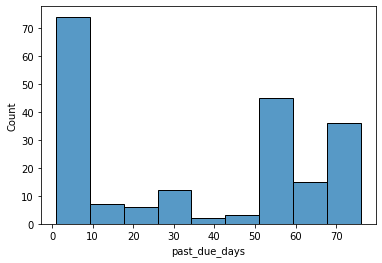

In [ ]:
sns.histplot(df['past_due_days'].dropna())

In [ ]:
df["past_due_days"].dropna().mean()
df["past_due_days"].mean()

36.01

In [ ]:
df['past_due_days'] = df['past_due_days'].fillna(df["past_due_days"].mean())

In [ ]:
df[df["paid_off_time"].isnull()]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
300,xqd20160301,COLLECTION,1000,15,9/9/2016,9/23/2016,NaN,76.0,29,college,male
301,xqd20160302,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,37,High School or Below,male
302,xqd20160303,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,33,High School or Below,male
303,xqd20160304,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,27,college,male
304,xqd20160305,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,24,Bechalor,male
...,...,...,...,...,...,...,...,...,...,...,...
395,xqd20160396,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,25,High School or Below,male
396,xqd20160397,COLLECTION,1000,30,9/12/2016,10/11/2016,NaN,58.0,33,High School or Below,male
397,xqd20160398,COLLECTION,800,15,9/12/2016,9/26/2016,NaN,73.0,39,college,male
398,xqd20160399,COLLECTION,1000,30,9/12/2016,11/10/2016,NaN,28.0,28,college,male


In [ ]:
df["paid_off_time"] = df["paid_off_time"].fillna(-1)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,36.01,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,36.01,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,36.01,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,36.01,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,36.01,28,college,female


In [ ]:
df.dtypes

Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

In [ ]:
def changetodatetime(col):
    df[col] = pd.to_datetime(df[col])

In [ ]:
for features in df[["effective_date","due_date","paid_off_time"]]:
    changetodatetime(features)

In [ ]:
df["paid_off_time"] = (df["paid_off_time"]).dt.date

In [ ]:
df["effective_date"].dt.year.unique()
df["due_date"].dt.year.unique()
df["paid_off_time"].dt.year.unique()

array([2016, 1969], dtype=int64)

In [ ]:
df["paid_off_time"].value_counts()

1969-12-31 23:59:59.999999999    100
2016-09-25 09:00:00.000000000      9
2016-09-26 09:00:00.000000000      9
2016-10-10 09:00:00.000000000      8
2016-10-13 09:00:00.000000000      6
                                ... 
2016-09-24 16:15:00.000000000      1
2016-09-22 10:30:00.000000000      1
2016-10-07 23:07:00.000000000      1
2016-10-03 12:50:00.000000000      1
2016-09-27 14:21:00.000000000      1
Name: paid_off_time, Length: 321, dtype: int64

In [ ]:
def newcolumns(col):
    df[col+"_"+"day"] = df[col].dt.day
    df[col+"_"+"month"] = df[col].dt.month

In [ ]:
for i in df[["effective_date","due_date","paid_off_time"]]:
    newcolumns(i)

In [ ]:
def new(col):
    if(df[col]==-1):
        df[col+"_"+"day"] = -1
        df[col+"_"+"month"] = -1
    else:
        df[col+"_"+"day"] = df[col].dt.day
        df[col+"_"+"month"] = df[col].dt.month

In [ ]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,effective_date_day,effective_date_month,due_date_day,due_date_month,paid_off_time_day,paid_off_time_month
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,36.01,45,High School or Below,male,8,9,7,10,14,9
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,36.01,50,Bechalor,female,8,9,7,10,7,10
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,36.01,33,Bechalor,female,8,9,7,10,25,9
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,36.01,27,college,male,8,9,22,9,22,9
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,36.01,28,college,female,9,9,8,10,23,9


In [ ]:
df[df["paid_off_time"].dt.year==1969]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,effective_date_day,effective_date_month,due_date_day,due_date_month,paid_off_time_day,paid_off_time_month
300,xqd20160301,COLLECTION,1000,15,2016-09-09,2016-09-23,1969-12-31 23:59:59.999999999,36.01,29,college,male,9,9,23,9,31,12
301,xqd20160302,COLLECTION,1000,30,2016-09-09,2016-10-08,1969-12-31 23:59:59.999999999,36.01,37,High School or Below,male,9,9,8,10,31,12
302,xqd20160303,COLLECTION,1000,30,2016-09-09,2016-10-08,1969-12-31 23:59:59.999999999,36.01,33,High School or Below,male,9,9,8,10,31,12
303,xqd20160304,COLLECTION,800,15,2016-09-09,2016-09-23,1969-12-31 23:59:59.999999999,36.01,27,college,male,9,9,23,9,31,12
304,xqd20160305,COLLECTION,800,15,2016-09-09,2016-09-23,1969-12-31 23:59:59.999999999,36.01,24,Bechalor,male,9,9,23,9,31,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,xqd20160396,COLLECTION,1000,30,2016-09-11,2016-10-10,1969-12-31 23:59:59.999999999,36.01,25,High School or Below,male,11,9,10,10,31,12
396,xqd20160397,COLLECTION,1000,30,2016-09-12,2016-10-11,1969-12-31 23:59:59.999999999,36.01,33,High School or Below,male,12,9,11,10,31,12
397,xqd20160398,COLLECTION,800,15,2016-09-12,2016-09-26,1969-12-31 23:59:59.999999999,36.01,39,college,male,12,9,26,9,31,12
398,xqd20160399,COLLECTION,1000,30,2016-09-12,2016-11-10,1969-12-31 23:59:59.999999999,36.01,28,college,male,12,9,10,11,31,12


C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Principal'>

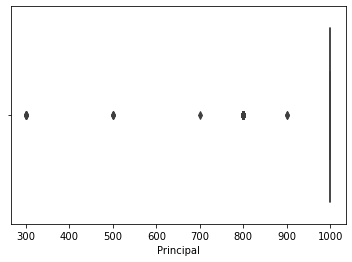

In [ ]:
sns.boxplot(df["Principal"])

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='terms'>

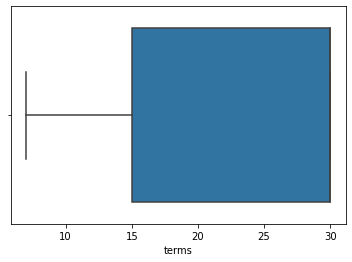

In [ ]:
sns.boxplot(df["terms"])

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='past_due_days'>

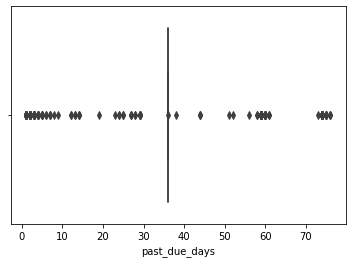

In [ ]:
sns.boxplot(df["past_due_days"])

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

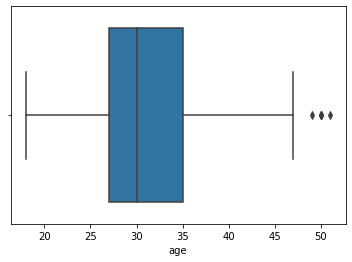

In [ ]:
sns.boxplot(df["age"])

In [ ]:
df["past_due_days"].value_counts()

36.01    500
Name: past_due_days, dtype: int64

In [ ]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    higher_range = Q3 + (1.5*IQR)
    return lower_range,higher_range

In [ ]:
lowincome,highincome = remove_outliers(df['past_due_days'])
df["past_due_days"] = np.where(df["past_due_days"]>highincome,highincome,df["past_due_days"])
df["past_due_days"] = np.where(df["past_due_days"]<lowincome,lowincome,df["past_due_days"])

ENCODING

In [ ]:
df.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender', 'effective_date_day', 'effective_date_month', 'due_date_day',
       'due_date_month', 'paid_off_time_day', 'paid_off_time_month'],
      dtype='object')

In [ ]:
df["Loan_ID"].unique()

array(['xqd20166231', 'xqd20168902', 'xqd20160003', 'xqd20160004',
       'xqd20160005', 'xqd20160706', 'xqd20160007', 'xqd20160008',
       'xqd20160909', 'xqd20160010', 'xqd20160011', 'xqd20160012',
       'xqd20160013', 'xqd20160014', 'xqd20160015', 'xqd20160016',
       'xqd20160017', 'xqd20160018', 'xqd20160019', 'xqd20160020',
       'xqd20160021', 'xqd20160022', 'xqd20160023', 'xqd20160024',
       'xqd20160025', 'xqd20160026', 'xqd20160027', 'xqd20170088',
       'xqd20160029', 'xqd20160030', 'xqd88160031', 'xqd20160032',
       'xqd20160033', 'xqd22169034', 'xqd20160035', 'xqd20160036',
       'xqd20160037', 'xqd20160038', 'xqd20160039', 'xqd20160040',
       'xqd20160041', 'xqd20160042', 'xqd20160043', 'xqd20160044',
       'xqd20160045', 'xqd20160046', 'xqd20160047', 'xqd20160048',
       'xqd20160049', 'xqd20160050', 'xqd20160051', 'xqd20160052',
       'xqd20160053', 'xqd20160054', 'xqd20160055', 'xqd20160056',
       'xqd20160057', 'xqd20160058', 'xqd20160059', 'xqd201600

In [ ]:
df["education"].unique()

array(['High School or Below', 'Bachelor', 'college', 'Master or Above'],
      dtype=object)

In [ ]:
df["education"].replace('Bechalor',"Bachelor",inplace=True)

In [ ]:
df["education"] = df["education"].map({'High School or Below':1,"college":2,"Bachelor":3,"Master or Above":4})

In [ ]:
df["education"].value_counts()

2    220
1    209
3     67
4      4
Name: education, dtype: int64

In [ ]:
df["Gender"].value_counts()

1    423
0     77
Name: Gender, dtype: int64

In [ ]:
df["Gender"] = df["Gender"].apply(lambda x : 1 if x=="male" else 0)

In [ ]:
df["loan_status"].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

In [ ]:
df['loan_status'].value_counts()

PAIDOFF               300
COLLECTION            100
COLLECTION_PAIDOFF    100
Name: loan_status, dtype: int64

In [ ]:
# paid_off : 0 , collection : -1, collection_paidoff : 1

In [ ]:
df['loan_status'] = df['loan_status'].map({'PAIDOFF':0,"COLLECTION":-1,"COLLECTION_PAIDOFF":1})

<AxesSubplot:xlabel='loan_status', ylabel='Density'>

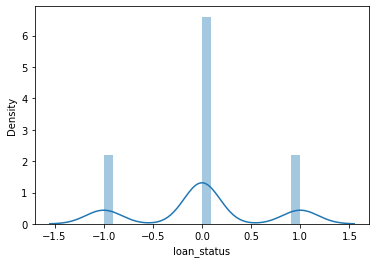

In [ ]:
sns.distplot(df['loan_status'])

In [ ]:
sns.distplot(x="Principal",y = "terms",hue='loan_status',data=df,style='x')

TypeError: distplot() got an unexpected keyword argument 'y'

In [ ]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,effective_date_day,effective_date_month,due_date_day,due_date_month,paid_off_time_day,paid_off_time_month
0,xqd20166231,0,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,36.01,45,1,1,8,9,7,10,14,9
1,xqd20168902,0,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,36.01,50,3,0,8,9,7,10,7,10
2,xqd20160003,0,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,36.01,33,3,0,8,9,7,10,25,9
3,xqd20160004,0,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,36.01,27,2,1,8,9,22,9,22,9
4,xqd20160005,0,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,36.01,28,2,0,9,9,8,10,23,9


<AxesSubplot:>

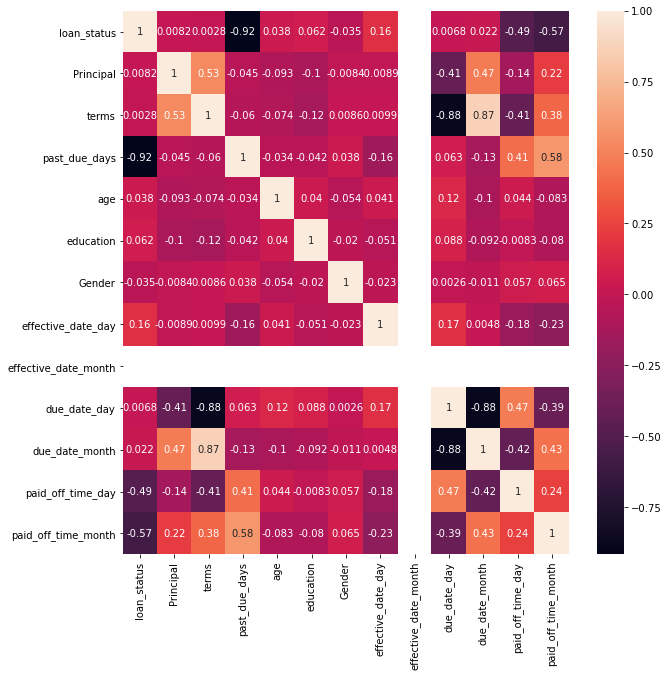

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df["effective_date_month"].unique()

array([9], dtype=int64)

SPLITTING

In [ ]:
df.drop(["Loan_ID","effective_date","due_date","paid_off_time"],axis=1,inplace=True)

In [ ]:
df.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender,effective_date_day,effective_date_month,due_date_day,due_date_month,paid_off_time_day,paid_off_time_month
0,0,1000,30,36.01,45,1,1,8,9,7,10,14,9
1,0,1000,30,36.01,50,3,0,8,9,7,10,7,10
2,0,1000,30,36.01,33,3,0,8,9,7,10,25,9
3,0,1000,15,36.01,27,2,1,8,9,22,9,22,9
4,0,1000,30,36.01,28,2,0,9,9,8,10,23,9


In [ ]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=1000,stop=1200,num=6)]
max_features = ["auto","sqrt"]
max_depth = [int(x) for x in np.linspace(start=7,stop=30,num=4)]
min_samples_split = [5,10,15,100]

In [ ]:
random_grid = {"n_estimators": n_estimators,
              "max_features" : max_features,
              "max_depth" : max_depth,
              "min_samples_split" : min_samples_split}

In [ ]:
penalty = ['l2']
C = [1]
dual = [False]
class_weight = ['dict','balanced']
l1_ratio = ['float']
intercept_scaling= [1]
max_iter= [int(x) for x in np.linspace(start=100,stop=500,num=3)]
multi_class = ['ovr','ovo']

In [ ]:
random_gr = {"penalty" : penalty,
            "C":C,
            "dual":dual,
            "class_weight":class_weight,
            "l1_ratio":l1_ratio,
            "intercept_scaling":intercept_scaling,
            "max_iter":max_iter,
            "multi_class":multi_class}

In [ ]:
rf_random = RandomizedSearchCV(lr,param_distributions=random_gr,cv=3,verbose=2,n_jobs=-1)

In [ ]:
rf_random.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\43720\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\43720\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\43720\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 1149, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
  File "C:\Users\43720\AppData\Roaming\Python\Python38\site-packages

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1],
                                        'class_weight': ['dict', 'balanced'],
                                        'dual': [False],
                                        'intercept_scaling': [1],
                                        'l1_ratio': ['float'],
                                        'max_iter': [100, 300, 500],
                                        'multi_class': ['ovr', 'ovo'],
                                        'penalty': ['l2']},
                   verbose=2)

In [ ]:
rf_random.best_params_

{'penalty': 'l2',
 'multi_class': 'ovr',
 'max_iter': 300,
 'l1_ratio': 'float',
 'intercept_scaling': 1,
 'dual': False,
 'class_weight': 'balanced',
 'C': 1}

In [ ]:
y_pred = rf_random.predict(X_test_scaled)
y_pred

array([-1,  0, -1,  0,  0, -1, -1,  0,  0,  1,  0,  0,  1,  0, -1, -1,  1,
        0, -1, -1,  1,  1,  0, -1,  0,  1,  1,  0,  0, -1,  1, -1,  1,  0,
        0, -1,  1,  0,  0,  0, -1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0, -1,  1,  0,  0,  1,  0,
        0, -1, -1, -1,  0,  0, -1, -1,  0,  0,  1,  1,  0,  0,  1,  0, -1,
        0,  0,  1, -1,  0, -1,  1, -1, -1,  1, -1,  0,  0,  1,  0,  0,  1,
        0, -1, -1,  0, -1,  0, -1,  0,  0,  1, -1,  0,  1,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  1,  0,  0, -1,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1],
      dtype=int64)

In [ ]:
df2 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df2

,Actual,Predicted
361,-1,-1
73,0,0
374,-1,-1
155,0,0
104,0,0
...,...,...
266,0,0
23,0,0
222,0,0
261,0,0


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        31
           0       1.00      1.00      1.00        88
           1       1.00      0.97      0.98        31

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[31,  0,  0],
       [ 0, 88,  0],
       [ 1,  0, 30]], dtype=int64)

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_status', ylabel='Density'>

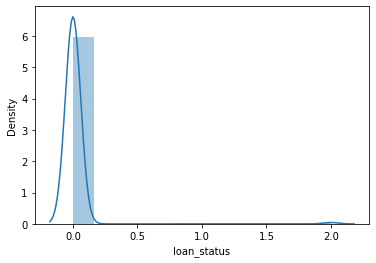

In [ ]:
sns.distplot(y_test-y_pred)

In [ ]:
#using roc score and roc curve
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
print(roc_auc_score(y_test,y_pred))

ValueError: multi_class must be in ('ovo', 'ovr')

array([[<AxesSubplot:title={'center':'Principal'}>,
        <AxesSubplot:title={'center':'terms'}>],
       [<AxesSubplot:title={'center':'past_due_days'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

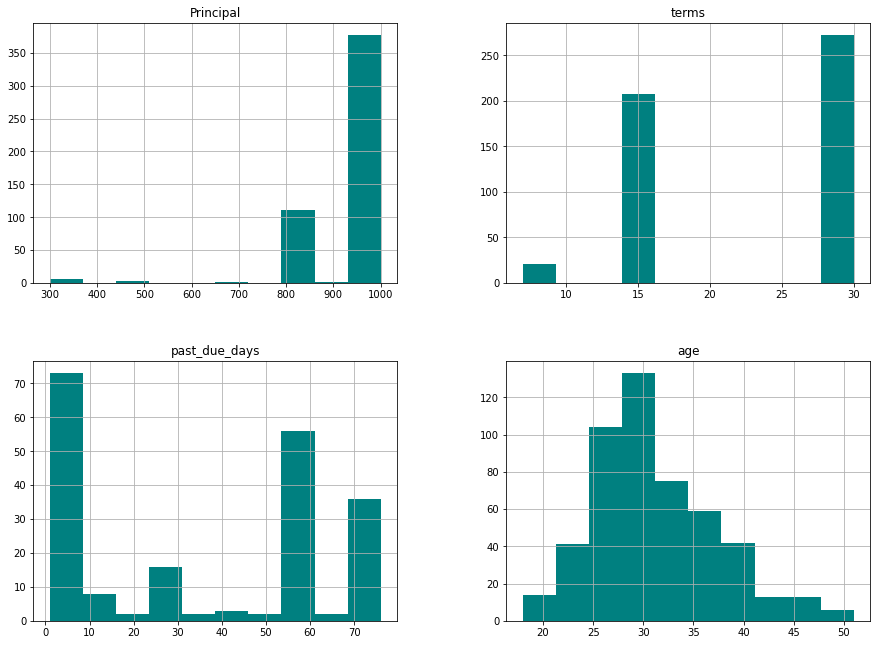

In [ ]:
df.hist(figsize = (15,11), color="#008080")

<AxesSubplot:>

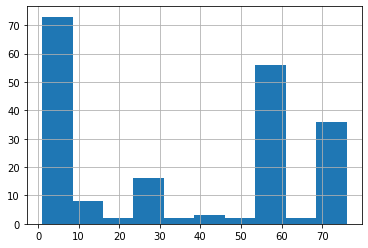

In [ ]:
df["past_due_days"].hist()

In [ ]:
df['paid_off_time'] = pd.to_datetime(df['paid_off_time']).dt.date

In [ ]:
df["past_due_days"].fillna(df["past_due_days"].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days       0
age                 0
education           0
Gender              0
dtype: int64

In [ ]:
df["paid_off_time"] = df["paid_off_time"].fillna(-1)

In [ ]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14,36.01,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07,36.01,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25,36.01,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22,36.01,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23,36.01,28,college,female


In [ ]:
df["education"] = df["education"].replace("Bechalor","Bachelor")

In [ ]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14,36.01,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07,36.01,50,Bachelor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25,36.01,33,Bachelor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22,36.01,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23,36.01,28,college,female


In [ ]:
df["Principal"].value_counts()

1000    377
800     111
300       6
500       3
900       2
700       1
Name: Principal, dtype: int64

In [ ]:
df["effective_date"].unique()

array(['2016-09-08T00:00:00.000000000', '2016-09-09T00:00:00.000000000',
       '2016-09-10T00:00:00.000000000', '2016-09-11T00:00:00.000000000',
       '2016-09-12T00:00:00.000000000', '2016-09-13T00:00:00.000000000',
       '2016-09-14T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
df["paid_off_time"].unique()

array([datetime.date(2016, 9, 14), datetime.date(2016, 10, 7),
       datetime.date(2016, 9, 25), datetime.date(2016, 9, 22),
       datetime.date(2016, 9, 23), datetime.date(2016, 9, 9),
       datetime.date(2016, 10, 5), datetime.date(2016, 10, 8),
       datetime.date(2016, 9, 24), datetime.date(2016, 9, 11),
       datetime.date(2016, 10, 9), datetime.date(2016, 9, 13),
       datetime.date(2016, 9, 15), datetime.date(2016, 9, 27),
       datetime.date(2016, 10, 3), datetime.date(2016, 9, 29),
       datetime.date(2016, 9, 21), datetime.date(2016, 10, 10),
       datetime.date(2016, 9, 20), datetime.date(2016, 9, 12),
       datetime.date(2016, 9, 30), datetime.date(2016, 11, 9),
       datetime.date(2016, 9, 17), datetime.date(2016, 10, 6),
       datetime.date(2016, 9, 16), datetime.date(2016, 10, 25),
       datetime.date(2016, 9, 26), datetime.date(2016, 10, 1),
       datetime.date(2016, 9, 18), datetime.date(2016, 10, 26),
       datetime.date(2016, 10, 11), datetime.date(201

In [ ]:
df["effective_day"] = df["effective_date"].dt.day

In [ ]:
df["effective_month"] = df["effective_date"].dt.month

In [ ]:
df["due_day"] = df["due_date"].dt.day

In [ ]:
df["due_month"] = df["due_date"].dt.month

In [ ]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,effective_day,effective_month,due_day,due_month
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14,36.01,45,High School or Below,male,8,9,7,10
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07,36.01,50,Bachelor,female,8,9,7,10
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25,36.01,33,Bachelor,female,8,9,7,10
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22,36.01,27,college,male,8,9,22,9
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23,36.01,28,college,female,9,9,8,10


In [ ]:
df["paid_off_time"].value_counts()

-1            100
2016-09-25     35
2016-10-10     33
2016-10-11     31
2016-09-26     29
             ... 
2016-11-03      1
2016-10-31      1
2016-12-02      1
2016-11-21      1
2016-09-09      1
Name: paid_off_time, Length: 65, dtype: int64

In [ ]:
df["past_due_days"] = df["past_due_days"].astype('str')

In [ ]:
df[["past_due_day","past_due_extraday"]] = df["past_due_days"].str.split(".",expand=True)

In [ ]:
df["past_due_extraday"].value_counts()

01    300
0     200
Name: past_due_extraday, dtype: int64

In [ ]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,effective_day,effective_month,due_day,due_month
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14,36.01,45,High School or Below,male,8,9,7,10
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07,36.01,50,Bachelor,female,8,9,7,10
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25,36.01,33,Bachelor,female,8,9,7,10
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22,36.01,27,college,male,8,9,22,9
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23,36.01,28,college,female,9,9,8,10


In [ ]:
df["Gender"] = df["Gender"].map({"female":1,"male":0})

In [ ]:
educate = pd.get_dummies(df["education"],drop_first=True)

In [ ]:
df["education"] = df["education"].map({"High School or Below":1,"college":2,"Bachelor":3,"Master or Above":4})

In [ ]:
df["education"].value_counts()

2    220
1    209
3     67
4      4
Name: education, dtype: int64

In [ ]:
df["education"].fillna(df["education"].mode(),inplace=True)

In [ ]:
df["education"]

0      1
1      3
2      3
3      2
4      2
      ..
495    1
496    1
497    2
498    2
499    1
Name: education, Length: 500, dtype: int64

In [ ]:
df = pd.concat([df,educate],axis=1)

In [ ]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,effective_day,effective_month,due_day,due_month
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14,36.01,45,1,0,8,9,7,10
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07,36.01,50,3,1,8,9,7,10
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25,36.01,33,3,1,8,9,7,10
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22,36.01,27,2,0,8,9,22,9
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23,36.01,28,2,1,9,9,8,10


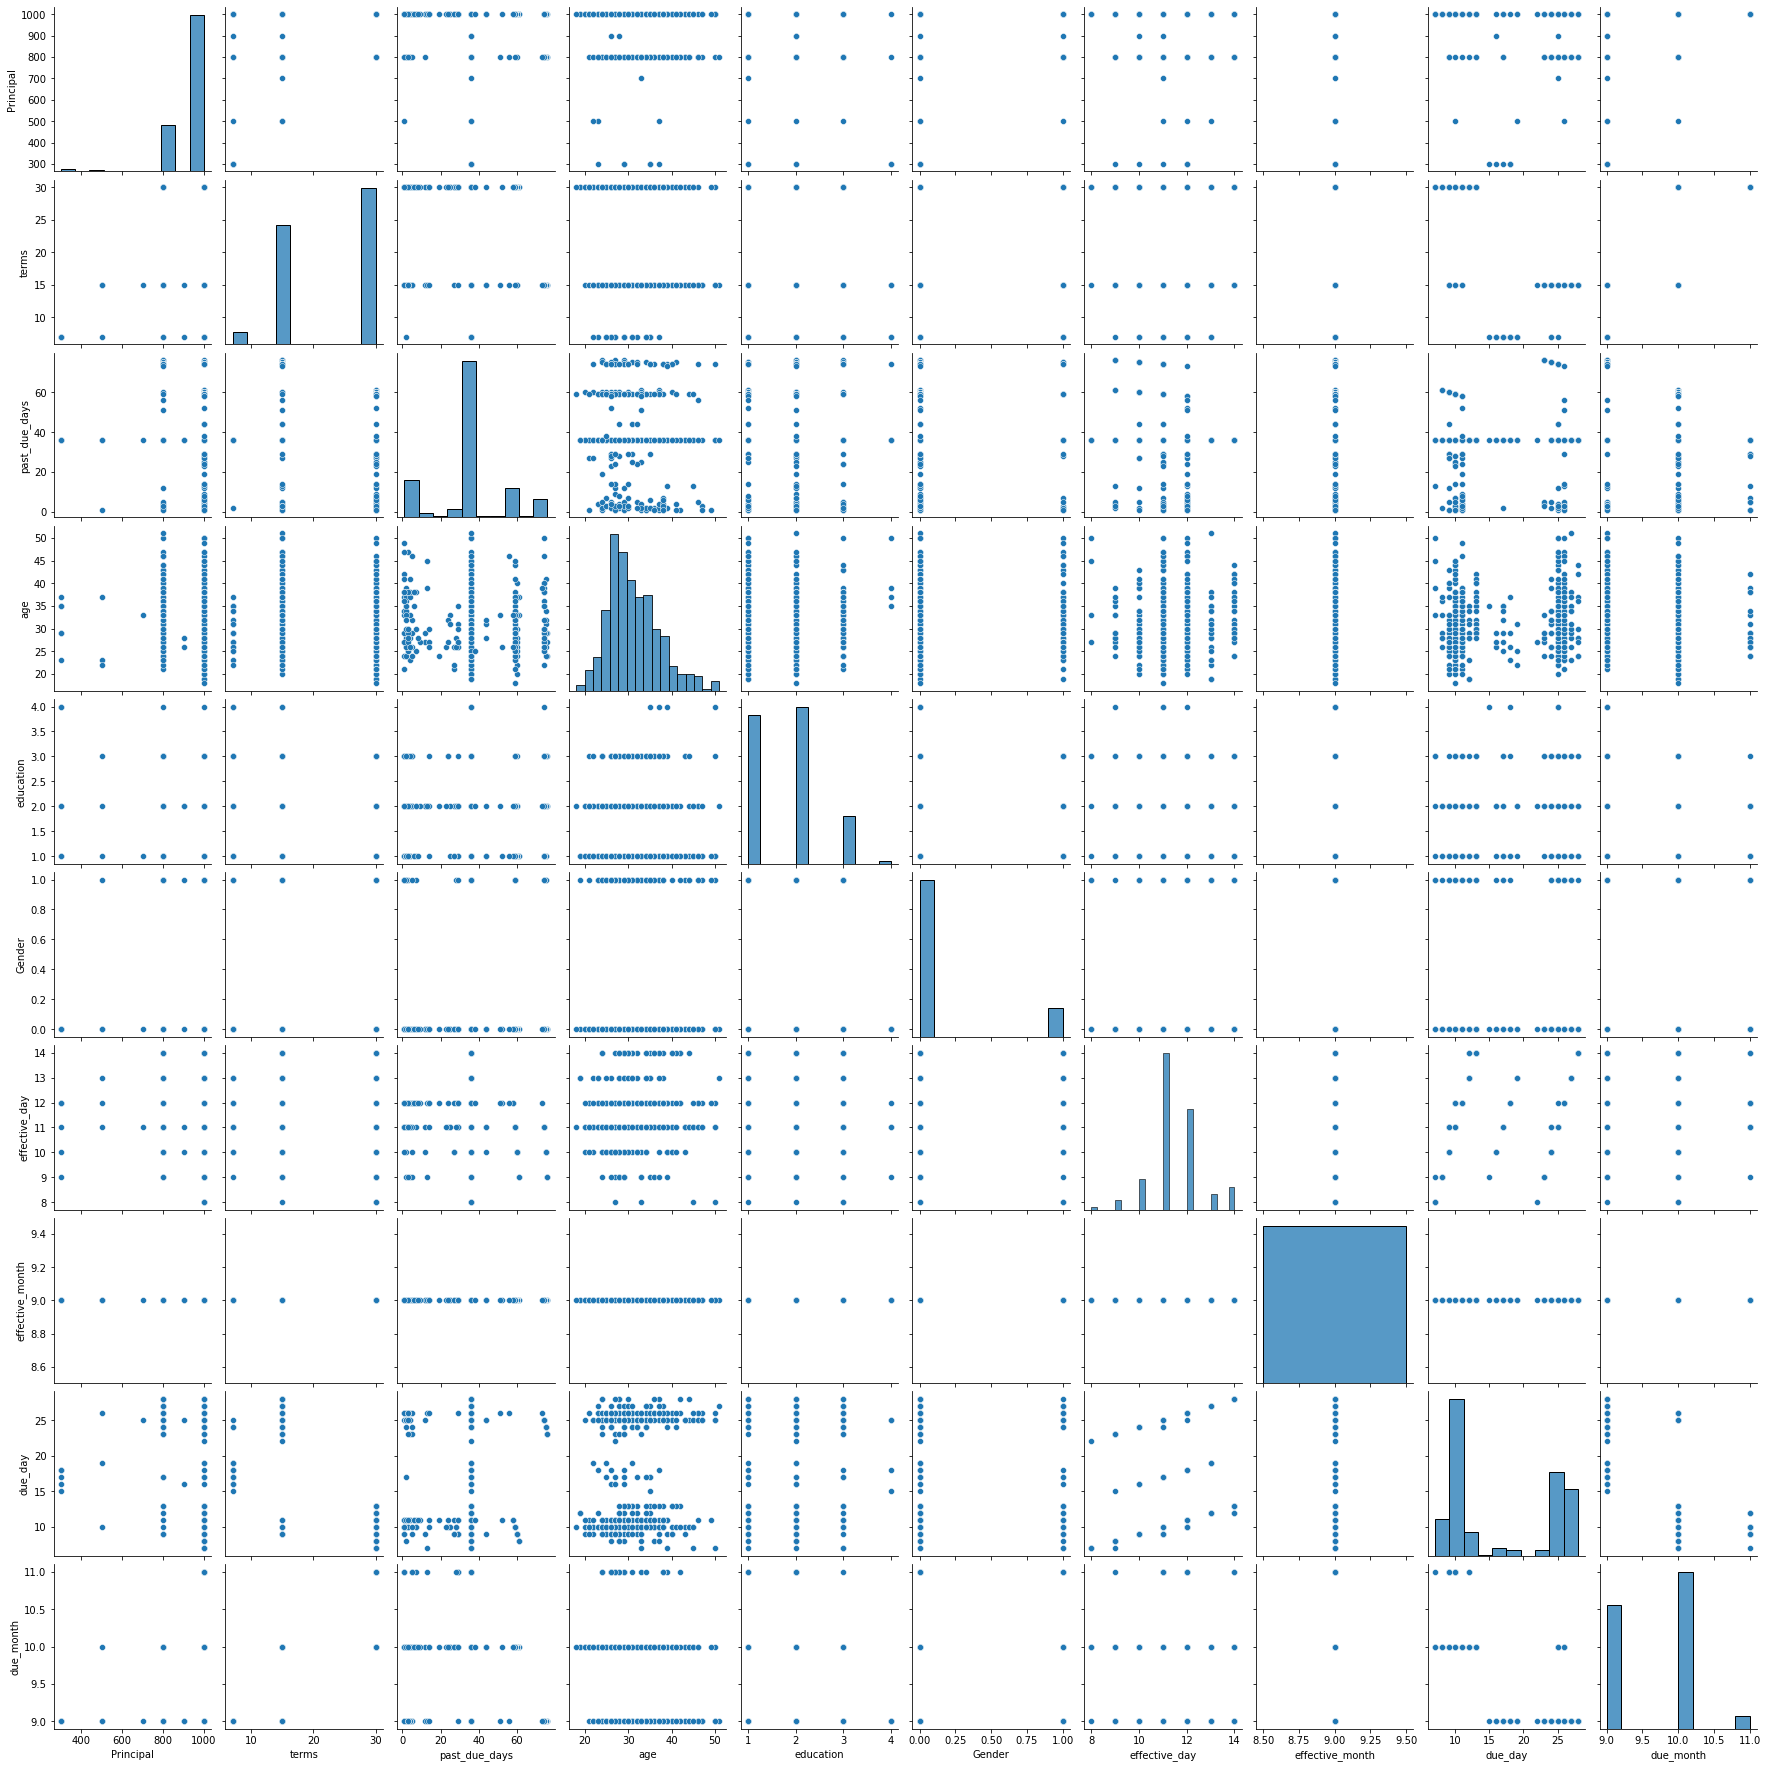

In [ ]:
sns.pairplot(df)

In [ ]:
df["paid_off_time"].value_counts()

-1            100
2016-09-25     35
2016-10-10     33
2016-10-11     31
2016-09-26     29
             ... 
2016-11-03      1
2016-10-31      1
2016-12-02      1
2016-11-21      1
2016-09-09      1
Name: paid_off_time, Length: 65, dtype: int64

In [ ]:
df["loan_status"] = df["loan_status"].map({'PAIDOFF':1,"COLLECTION":2,"COLLECTION_PAIDOFF":3})

In [ ]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,effective_day,effective_month,due_day,due_month
0,xqd20166231,1,1000,30,2016-09-08,2016-10-07,2016-09-14,36.01,45,1,0,8,9,7,10
1,xqd20168902,1,1000,30,2016-09-08,2016-10-07,2016-10-07,36.01,50,3,1,8,9,7,10
2,xqd20160003,1,1000,30,2016-09-08,2016-10-07,2016-09-25,36.01,33,3,1,8,9,7,10
3,xqd20160004,1,1000,15,2016-09-08,2016-09-22,2016-09-22,36.01,27,2,0,8,9,22,9
4,xqd20160005,1,1000,30,2016-09-09,2016-10-08,2016-09-23,36.01,28,2,1,9,9,8,10


<AxesSubplot:xlabel='Gender', ylabel='count'>

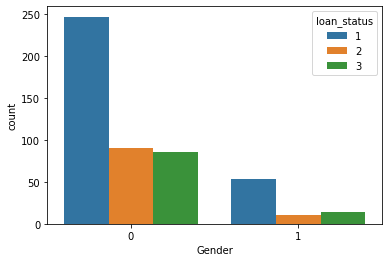

In [ ]:
sns.countplot(x="Gender",hue="loan_status",data=df)

In [ ]:
df["Gender"].value_counts()

0    423
1     77
Name: Gender, dtype: int64

In [ ]:
a = 423+77
b = (77/a) * 100
c = (423/a)*100
print(b)
print(c)

15.4
84.6


<AxesSubplot:xlabel='Gender', ylabel='count'>

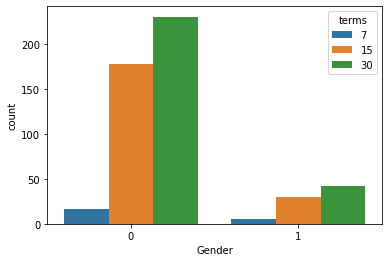

In [ ]:
sns.countplot(x="Gender",hue="terms",data=df)

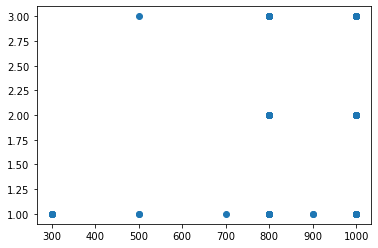

In [ ]:
plt.scatter("Principal","loan_status",data=df)

<AxesSubplot:>

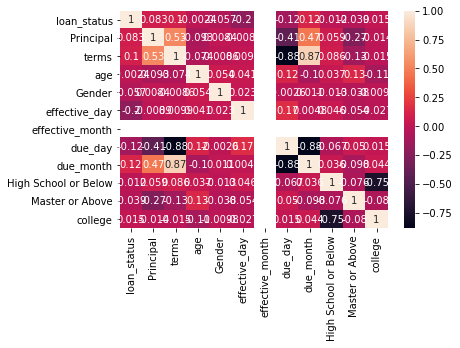

In [ ]:
sns.heatmap(df.corr(),annot=True)

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_status'>

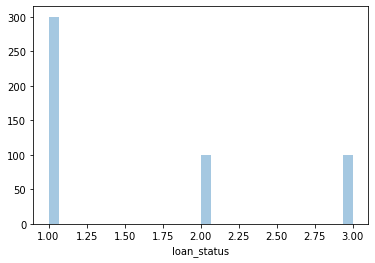

In [ ]:
sns.distplot(df["loan_status"],kde=False,bins=30)

EDA

In [ ]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,effective_day,effective_month,due_day,due_month
0,xqd20166231,1,1000,30,2016-09-08,2016-10-07,2016-09-14,36.01,45,1,0,8,9,7,10
1,xqd20168902,1,1000,30,2016-09-08,2016-10-07,2016-10-07,36.01,50,3,1,8,9,7,10
2,xqd20160003,1,1000,30,2016-09-08,2016-10-07,2016-09-25,36.01,33,3,1,8,9,7,10
3,xqd20160004,1,1000,15,2016-09-08,2016-09-22,2016-09-22,36.01,27,2,0,8,9,22,9
4,xqd20160005,1,1000,30,2016-09-09,2016-10-08,2016-09-23,36.01,28,2,1,9,9,8,10


In [ ]:
df.drop(["Loan_ID","effective_date","due_date"],axis=1,inplace=True)

In [ ]:
df.head()

,loan_status,Principal,terms,paid_off_time,past_due_days,age,education,Gender,effective_day,effective_month,due_day,due_month
0,1,1000,30,2016-09-14,36.01,45,1,0,8,9,7,10
1,1,1000,30,2016-10-07,36.01,50,3,1,8,9,7,10
2,1,1000,30,2016-09-25,36.01,33,3,1,8,9,7,10
3,1,1000,15,2016-09-22,36.01,27,2,0,8,9,22,9
4,1,1000,30,2016-09-23,36.01,28,2,1,9,9,8,10


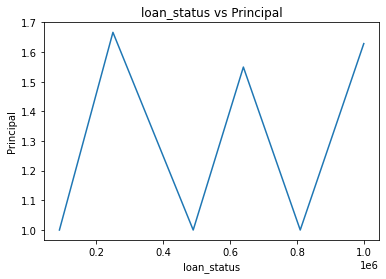

,transformed,loan_status
transformed,1.000000,0.077742
loan_status,0.077742,1.000000


In [ ]:
df["transformed"] = np.square(df["Principal"])
df.groupby("transformed")["loan_status"].mean().plot()
#df.plot(x="loan_status",y="Principal",style='o')
plt.title('loan_status vs Principal')
plt.xlabel("loan_status")
plt.ylabel("Principal")
plt.show()
df[["transformed","loan_status"]].corr()

In [ ]:
df[["loan_status","Principal"]].corr()

,loan_status,Principal
loan_status,1.000000,0.083388
Principal,0.083388,1.000000


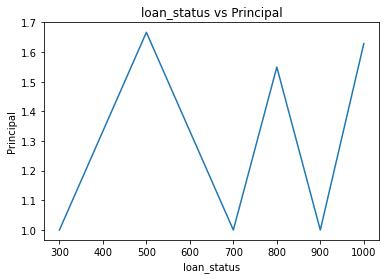

In [ ]:
df.groupby("Principal")["loan_status"].mean().plot()
#df.plot(x="Principal",y="loan_status",style='o')
plt.title('loan_status vs Principal')
plt.xlabel("loan_status")
plt.ylabel("Principal")
plt.show()

In [ ]:
df[["Principal","loan_status"]].corr()

,Principal,loan_status
Principal,1.000000,0.083388
loan_status,0.083388,1.000000
